In [220]:
import numpy as np

In [ ]:
import pandas as pd
pd.set_option('Display.max_columns',530)
a = pd.read_csv('/Data2/skt_fellowship/bc22/UJIndoorLoc/trainingData.csv')
a

In [222]:
# 사실 의미 없는듯.. min값 max값 보는 정도..? 수치형 데이터 값만 보는게 좋을듯
for i in range(0,len(a.columns),10) :
    print(a[a.columns[i:i+10]].describe())

             WAP001        WAP002   WAP003   WAP004        WAP005  \
count  19937.000000  19937.000000  19937.0  19937.0  19937.000000   
mean      99.823644     99.820936    100.0    100.0     99.613733   
std        5.866842      5.798156      0.0      0.0      8.615657   
min      -97.000000    -90.000000    100.0    100.0    -97.000000   
25%      100.000000    100.000000    100.0    100.0    100.000000   
50%      100.000000    100.000000    100.0    100.0    100.000000   
75%      100.000000    100.000000    100.0    100.0    100.000000   
max      100.000000    100.000000    100.0    100.0    100.000000   

             WAP006        WAP007        WAP008        WAP009        WAP010  
count  19937.000000  19937.000000  19937.000000  19937.000000  19937.000000  
mean      97.130461     94.733661     93.820234     94.693936     99.163766  
std       22.931890     30.541335     33.010404     30.305084     12.634045  
min      -98.000000    -99.000000    -98.000000    -98.000000    -

<Axes: >

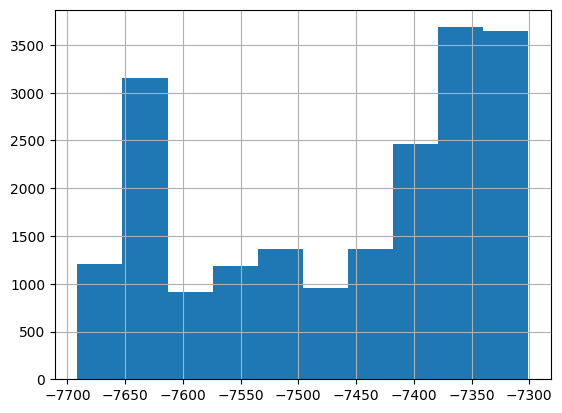

In [371]:
a['LONGITUDE'].hist()

<Axes: >

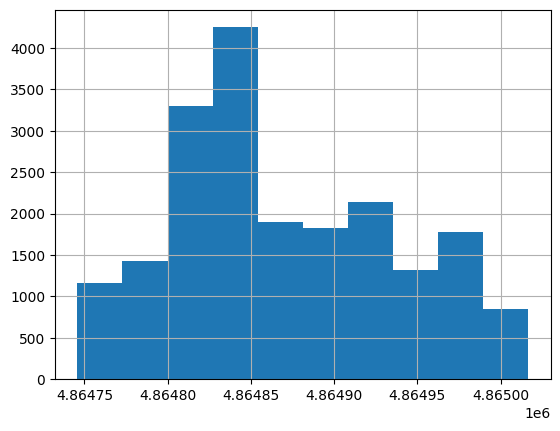

In [372]:
a['LATITUDE'].hist()

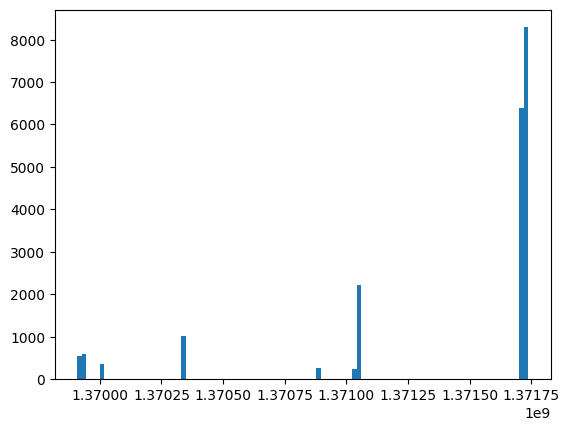

In [380]:
plt.hist(a['TIMESTAMP'],bins=100)
plt.show()

In [223]:
print(f"실외 데이터 수 : {len(a[a['RELATIVEPOSITION']==2]['RELATIVEPOSITION'])}")
print(f"실내 데이터 수 : {len(a[a['RELATIVEPOSITION']==1]['RELATIVEPOSITION'])}")

실외 데이터 수 : 16608
실내 데이터 수 : 3329


- Attributes 001 to 520 (WAP001-WAP520): Intensity value for WAP001.Negative integer values from -104 to 0 and +100. Positive value 100used if WAP001 was not detected.
- Attribute 521 (Longitude): Longitude. Negative real values from 7695.9387549299299000 to -7299.786516730871000
- Attribute 522 (Latitude): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
- Attribute 523 (Floor): Altitude in floors inside the building.Integer values from 0 to 4.
- Attribute 524 (BuildingID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
- Attribute 525 (SpaceID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
- Attribute 526 (RelativePosition): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.
- Attribute 527 (UserID): User identifier (see below). Categorical integer values.
- Attribute 528 (PhoneID): Android device identifier (see below). Categorical integer values.
- Attribute 529 (Timestamp): UNIX Time when the capture was taken. Integer value.

- 범주형 피쳐
     - BUILDINGID
     - SPACEID
     - USERID
     - PHONEID
     
- 수치형 피쳐
     - Timestamp
     - Longitude
     - Latitude
     - Floor


In [330]:
categorical_feature = ['BUILDINGID','SPACEID','USERID','PHONEID']
categorical_df = a[categorical_feature]
cat_dict = {}
for feat in categorical_df :
    cat_dict[feat] = [a[feat].value_counts().index, len(a[feat].value_counts().index)]
cat_dict    

{'BUILDINGID': [Int64Index([2, 0, 1], dtype='int64'), 3],
 'SPACEID': [Int64Index([202, 106, 107, 104, 102, 101, 201, 103, 108, 105,
              ...
              250,  25,  18,  28,  27,  11,  14, 142, 254,  22],
             dtype='int64', length=123),
  123],
 'USERID': [Int64Index([11, 1, 14, 7, 2, 9, 16, 6, 10, 13, 17, 5, 8, 15, 18, 12, 4, 3], dtype='int64'),
  18],
 'PHONEID': [Int64Index([14, 13, 7, 6, 23, 19, 8, 17, 22, 3, 1, 11, 10, 24, 18, 16], dtype='int64'),
  16]}

<Axes: >

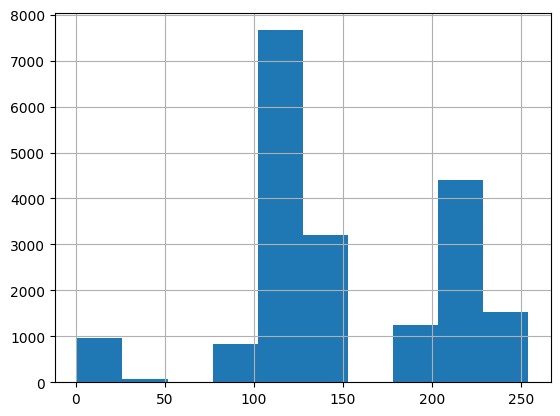

In [333]:
categorical_df['SPACEID'].hist()
# 3개로 묶어도 되지 않을까?

<Axes: >

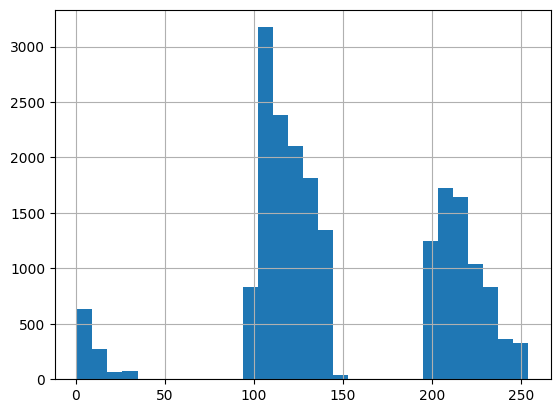

In [334]:
categorical_df['SPACEID'].hist(bins=30)


<Axes: >

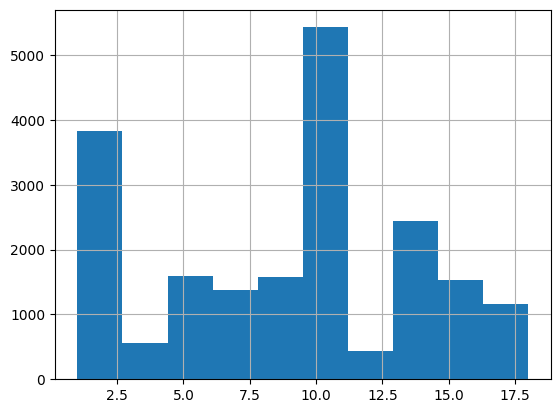

In [335]:
categorical_df['USERID'].hist()

<Axes: >

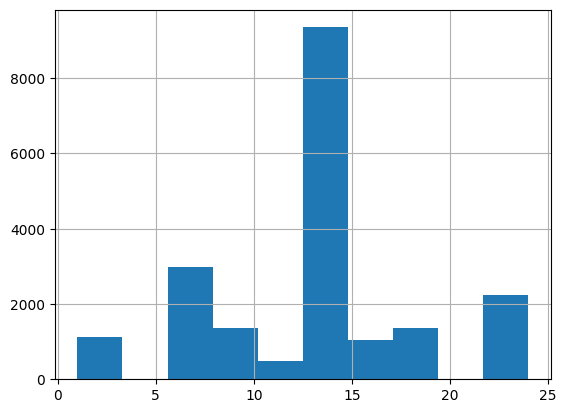

In [336]:
categorical_df['PHONEID'].hist()

### 거의다 신호가 없음..! 

In [224]:
# 각 AP당 포착한 횟수 확인
# [WAP n] 신호없음 / 전체시도
text = ''
for idx,col in enumerate(a.columns) :
    if col.startswith('W') :
        text += f'[WAP {idx}] '.ljust(10) + f'{sum(a[col] == 100)} / {len(a[col] == 100)} 비율 : {np.round((sum(a[col]==100)/len(a[col])),3)} . '.ljust(30)
        if (idx+1) % 3 == 0 :
            print(text)
            text = ''

[WAP 0]   19919 / 19937 비율 : 0.999 .    [WAP 1]   19918 / 19937 비율 : 0.999 .    [WAP 2]   19937 / 19937 비율 : 1.0 .      
[WAP 3]   19937 / 19937 비율 : 1.0 .      [WAP 4]   19897 / 19937 비율 : 0.998 .    [WAP 5]   19629 / 19937 비율 : 0.985 .    
[WAP 6]   19359 / 19937 비율 : 0.971 .    [WAP 7]   19260 / 19937 비율 : 0.966 .    [WAP 8]   19342 / 19937 비율 : 0.97 .     
[WAP 9]   19850 / 19937 비율 : 0.996 .    [WAP 10]  16981 / 19937 비율 : 0.852 .    [WAP 11]  16954 / 19937 비율 : 0.85 .     
[WAP 12]  17962 / 19937 비율 : 0.901 .    [WAP 13]  17982 / 19937 비율 : 0.902 .    [WAP 14]  18930 / 19937 비율 : 0.949 .    
[WAP 15]  18938 / 19937 비율 : 0.95 .     [WAP 16]  19853 / 19937 비율 : 0.996 .    [WAP 17]  19848 / 19937 비율 : 0.996 .    
[WAP 18]  19519 / 19937 비율 : 0.979 .    [WAP 19]  19547 / 19937 비율 : 0.98 .     [WAP 20]  19900 / 19937 비율 : 0.998 .    
[WAP 21]  19900 / 19937 비율 : 0.998 .    [WAP 22]  19156 / 19937 비율 : 0.961 .    [WAP 23]  19151 / 19937 비율 : 0.961 .    
[WAP 24]  19306 / 19937 비율 : 0.9

In [225]:
# AP만 뽑아내자.
AP_cols = [col for col in a.columns if col.startswith('WAP')]
AP_df = a[AP_cols]

In [227]:
# 행별 몇번의 AP에 탐지됐는 지 체크하기 위한 변수 : signal_ct
signal_check = []
for _,row in AP_df.iterrows() :
    ct = 0
    for j in row :
        if j!= 100 :
            ct += 1
    else :
        signal_check.append(ct)
AP_df['signal_ct'] = signal_check
AP_df['position'] = a['RELATIVEPOSITION']
AP_df.head()

/tmp/ipykernel_677/891118016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_df['signal_ct'] = signal_check
/tmp/ipykernel_677/891118016.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_df['position'] = a['RELATIVEPOSITION']


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,signal_ct,position
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,10

<Axes: xlabel='signal_ct', ylabel='Count'>

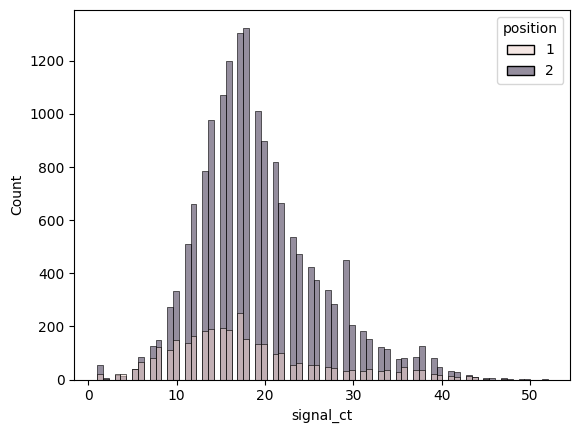

In [229]:
import seaborn as sns
#help(sns.histplot)
sns.histplot(data = AP_df[['signal_ct','position']],
            x = 'signal_ct',
            hue = 'position')

In [230]:
non_WAP_col = [col for col in a.columns if not col.startswith('WAP')]
feature_df = a[non_WAP_col]
feature_df.head()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


<Axes: xlabel='LONGITUDE', ylabel='Count'>

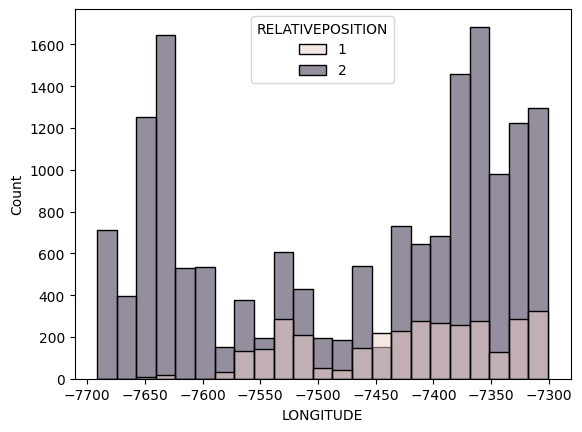

In [231]:
sns.histplot(data = feature_df,
                x = 'LONGITUDE',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='LATITUDE', ylabel='Count'>

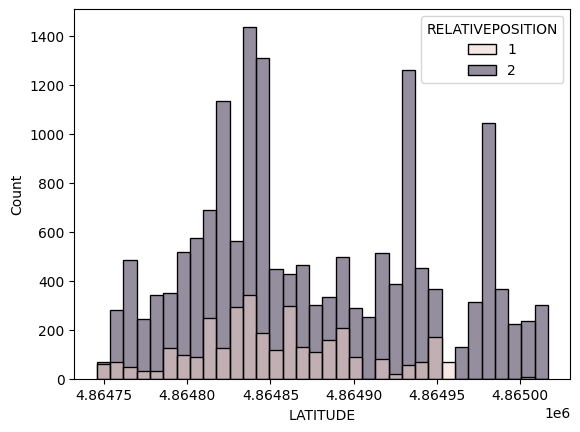

In [232]:
sns.histplot(data = feature_df,
                x = 'LATITUDE',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='FLOOR', ylabel='Count'>

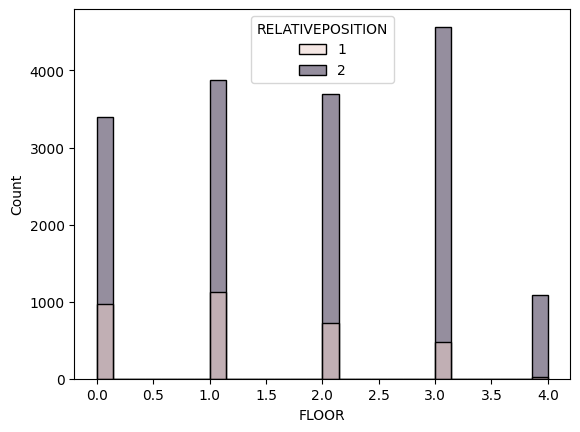

In [233]:
sns.histplot(data = feature_df,
                x = 'FLOOR',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='BUILDINGID', ylabel='Count'>

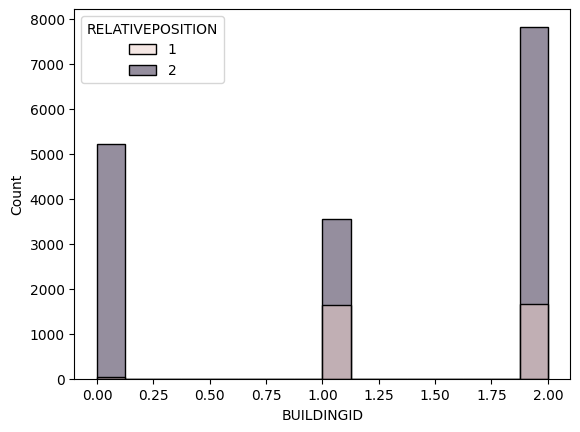

In [234]:
sns.histplot(data = feature_df,
                x = 'BUILDINGID',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='SPACEID', ylabel='Count'>

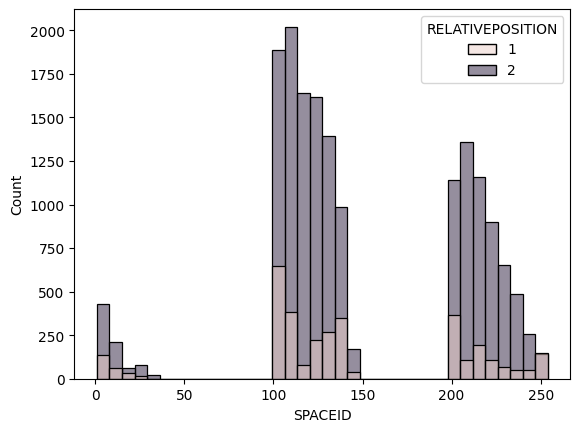

In [235]:
sns.histplot(data = feature_df,
                x = 'SPACEID',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='USERID', ylabel='Count'>

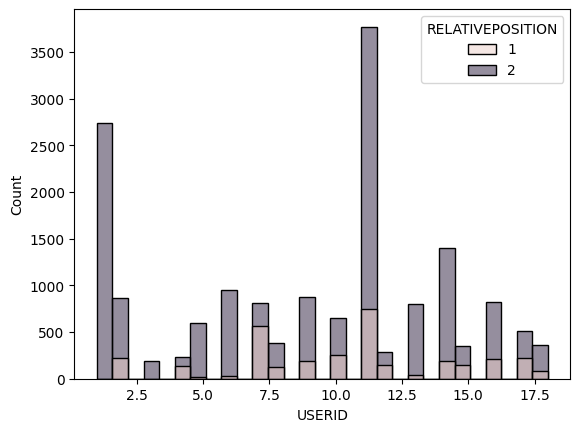

In [236]:
sns.histplot(data = feature_df,
                x = 'USERID',
                hue = 'RELATIVEPOSITION')

<Axes: xlabel='PHONEID', ylabel='Count'>

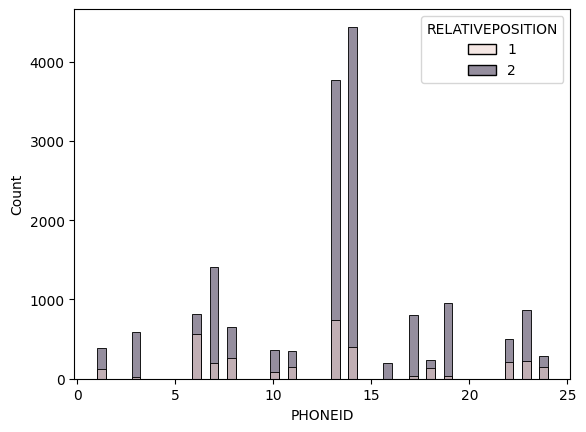

In [237]:
sns.histplot(data = feature_df,
                x = 'PHONEID',
                hue = 'RELATIVEPOSITION')

<Axes: >

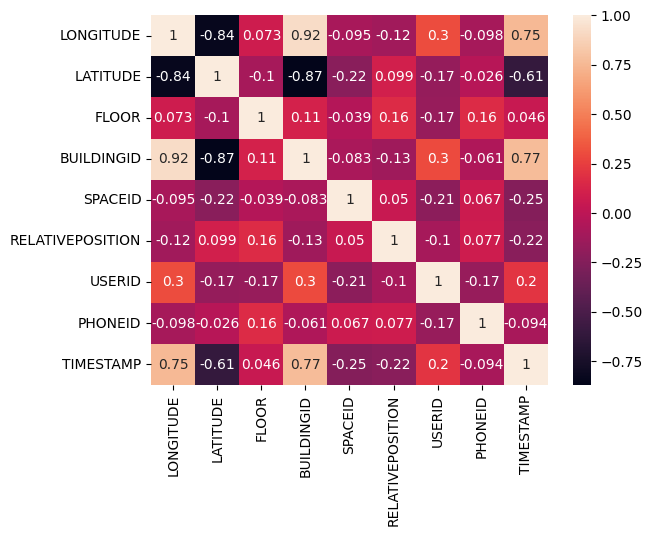

In [238]:
sns.heatmap(feature_df.corr(method = 'spearman'),annot=True )

<Axes: >

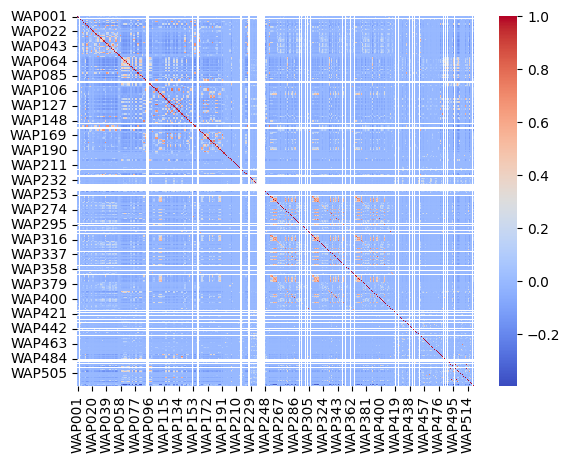

In [239]:
# 흰색 선은 전부다 같은 값인 듯??/??
sns.heatmap(AP_df.corr(), cmap = 'coolwarm')

In [240]:
all_not_sensor_point = 100 *len(AP_df)
AP_df.sum() == all_not_sensor_point # 이렇게만 봤을 때 3번 4번이 전부다 감지된게 없음 corr 찍어보자

WAP001       False
WAP002       False
WAP003        True
WAP004        True
WAP005       False
             ...  
WAP518       False
WAP519       False
WAP520        True
signal_ct    False
position     False
Length: 522, dtype: bool

<Axes: >

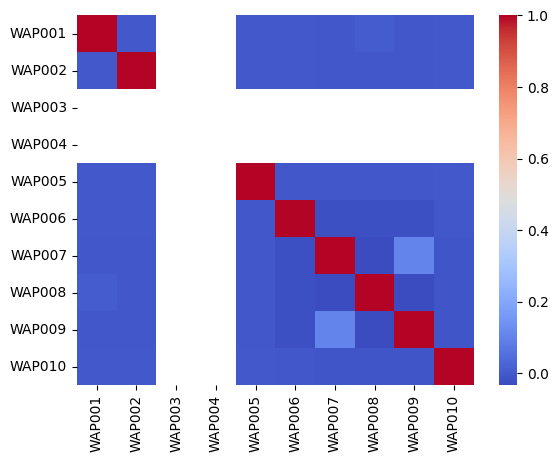

In [241]:
sns.heatmap(AP_df[AP_df.columns[:10]].corr(), cmap = 'coolwarm') # 그러면 다 같은 건 날려버리자

In [242]:
no_censor_AP = AP_df.columns[(AP_df.sum() == all_not_sensor_point)]

467


<Axes: >

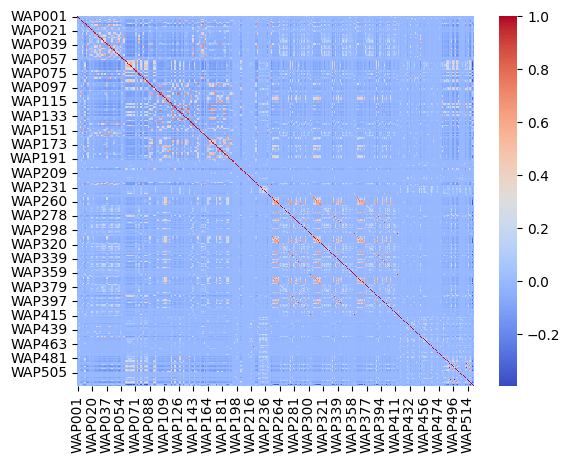

In [243]:
new_AP_feature = [col for col in AP_df.columns if col not in no_censor_AP]; print(len(new_AP_feature))
sns.heatmap(AP_df[new_AP_feature].corr(), cmap = 'coolwarm')

In [246]:
AP_df[new_AP_feature]

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP153,WAP154,WAP155,WAP156,WAP157,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP216,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP294,WAP295,WAP297,WAP298,WAP299,WAP300,WAP302,WAP305,WAP306,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP350,WAP351,WAP352,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP361,WAP362,WAP363,WAP364,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP417,WAP418,WAP420,WAP421,WAP422,WAP424,WAP425,WAP426,WAP427,WAP428,WAP430,WAP431,WAP432,WAP434,WAP435,WAP436,WAP437,WAP439,WAP440,WAP443,WAP446,WAP447,WAP448,WAP449,WAP450,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP483,WAP484,WAP486,WAP489,WAP490,WAP492,WAP493,WAP494,WAP495,WAP496,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,signal_ct,position
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-67,-68,100,100,100,100,100,100,100,-68,-68,-78,-79,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-92,-95,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,-89,-82,-81,100,-91,-54,-53,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-83

In [313]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(AP_df[new_AP_feature[:-1]])

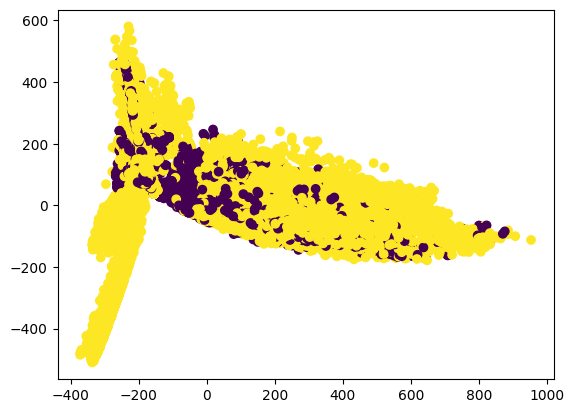

In [314]:
# DATASET을 AP만 썼을 때 
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1],c = AP_df[new_AP_feature[-1]])
plt.show()

In [316]:
'''
x1 = np.random.normal(60,33,1000)
y1 = np.random.normal(100,14,1000)

x2 = np.random.normal(0,35,1000)
y2 = np.random.normal(0,12,1000)

a1 = np.array([x1,y1]).T
a2 = np.array([x2,y2]).T

dataset = np.concatenate([a1,a2]);print(dataset.shape)

plt.scatter(dataset[:,0], dataset[:,1], c =[[1]*1000 +[2]*1000])
'''
pass

In [319]:
a['PHONEID'].value_counts()

14    4835
13    4516
7     1596
6     1383
23    1091
19     980
8      913
17     841
22     724
3      610
1      507
11     498
10     440
24     437
18     374
16     192
Name: PHONEID, dtype: int64

In [338]:
AP_df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,signal_ct,position
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,10

In [339]:
a['signal'] = AP_df['signal_ct']

In [342]:
val = a[:5000]
train = a[5000:]

In [345]:
train['RELATIVEPOSITION'].value_counts()

2    12677
1     2260
Name: RELATIVEPOSITION, dtype: int64

In [346]:
val['RELATIVEPOSITION'].value_counts()

2    3931
1    1069
Name: RELATIVEPOSITION, dtype: int64

In [349]:
train_x = train.drop(['RELATIVEPOSITION'],axis=1)
train_y = train['RELATIVEPOSITION']

In [352]:
val_x = val.drop(['RELATIVEPOSITION'],axis=1)
val_y = val['RELATIVEPOSITION']

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,USERID,PHONEID,TIMESTAMP,signal
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,1

In [365]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=3000, max_depth=11,random_state=0, class_weight = {1:90, 2:10})
clf.fit(train_x,train_y)

predict1 = clf.predict(val_x)
print(accuracy_score(val_y,predict1))
print(f1_score(val_y,predict1)) #?

0.462
0.40565620857269113


In [360]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [381]:
cat_dict

{'BUILDINGID': [Int64Index([2, 0, 1], dtype='int64'), 3],
 'SPACEID': [Int64Index([202, 106, 107, 104, 102, 101, 201, 103, 108, 105,
              ...
              250,  25,  18,  28,  27,  11,  14, 142, 254,  22],
             dtype='int64', length=123),
  123],
 'USERID': [Int64Index([11, 1, 14, 7, 2, 9, 16, 6, 10, 13, 17, 5, 8, 15, 18, 12, 4, 3], dtype='int64'),
  18],
 'PHONEID': [Int64Index([14, 13, 7, 6, 23, 19, 8, 17, 22, 3, 1, 11, 10, 24, 18, 16], dtype='int64'),
  16]}


# EDA 결과 및 토의해볼 내용
( ) : 토의해볼 내용

### 피쳐

 - Numeric
 
     - WAP001~WAP520 : RSS 신호 세기를 나타냄. 근데 거의다 100임 == Not Detected ( 결측값으로 봐야 하는 걸까? )
     - LONGITUDE : 크게 볼만한 점은 없어보임. ( 크게 두개의 분포로 보이는 것 같기도하고 ? )
     - LATITUDE : 이것 또한 크게 이상한 점은 없어보임
     - TIMESTAMP : 잘 이해가 안가는 피쳐 (같은 시간대를 묶어서 봐야 되나?) 
     
 
 - Categorical
 
     - BUILDINGID : 0,1,2
     - SPACEID : 총 123개 ( 3개의 그룹으로 묶을 수 있지 않을까 )
     - USERID : 별다른 특징없는 그냥 단순 명목 변수들
     - PHONEID : 별다른 특징없는 그냥 단순 명목 변수들2

### 토의해볼 내용 - 피쳐

 - 100 몇개정도의 AP가 전부 다 100을 나타냄 -> 한번도 탐지를 못한 센서들 -> 요런거는 히트맵에도 찍히지 않음 ( 제거하는 게 좋을 것 같음 )
 - 스피어만 상관계수 행렬로 찍어보면 히트맵 상에서 어떤 특정 AP들은 특정 AP들간 상호작용하는 모습이 보임.
     - E.G) 1번 AP에서 찍힌 값과 2번 AP에서 찍힌 값 ( 비슷한 위치에 있는 센서들이지 않을 까 추측됨.)
 - 각 행별로 포착된 샘플이 몇번의 AP에서 찍혔는 지 나타내는 변수`signal_ct`를 추가함. (추가적인 변수가 더 어떤게 필요할 지 생각하면 좋을 것 같음.)
 
### 토의해볼 내용 - 모델링

 - 지도학습  **데이터셋은 5000개는 validation, 5000~개는 training dataset으로 사용**
     
     - RandomForest
         - 정확도가 0.78이뜸 -> 뭐지 싶었는데 그냥 싹다 2였음. -> f1_score : 0 ㅋ
         - 그래서 가중치를 다르게 줘서 실험 진행해봄 -> acc : 0.48 / f1_score : 0.40
 
 - 비지도학습 **데이터셋은 AP 데이터셋으로만 진행함.**
    - PCA
        - 실제 label과 비교하려면 추가적인 작업이 필요함
            - 그룹을 2개로 나눌 순 있는데 어떤 그룹이 실내고, 실외인지는 파악을 추후에 해야함 -> 그래서 일단 그림으로 그려봤는데 ㄹㅇ 엉망
            
 - 실험해봐야 될 내용
     - 1.피쳐가공(범주형 자료들 전처리)
     - 2.지도학습 방법 알고리즘 사용
         - XGBOOST, DL
     - 3.비지도학습 방법 알고리즘
         - T-SNE, 여러 클러스터링 기법들
      